# Team 5: Universal Basic Income
### Author: Yingjie Ouyang

In this notebook, I will be analyzing the relationship between family size and poverty level to explore "Any interesting correlations with family size and the level of poverty".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Information on Poverty Threshold for Family Size 2022

This data comes from the US Census Bureau. It dictates the income (in dollars) threshold for families to count as being under the poverty line. The data takes into account the family size, as well as how many of the people in the family are children.

In [2]:
thresh_df = pd.read_excel("data/thresh22.xlsx", header=[4, 5], nrows=15).copy()
thresh_df.drop([3, 7], inplace=True)

indices = thresh_df['Size of family unit'].values.flatten()
indices = [x.strip('.') for x in indices]
thresh_df.index = indices
thresh_df.index.name = 'Size of family unit'
thresh_df.drop(columns=['Size of family unit'], axis=1, inplace=True)
thresh_df.drop(columns=['Eight or more.1'], axis=1, level=1, inplace=True)

In [3]:
thresh_df

Related children under 18 years           \
                                                              None      One   
Size of family unit                                                           
One person (unrelated individual):                             NaN      NaN   
Under 65 years                                             15225.0      NaN   
65 years and over                                          14036.0      NaN   
Two people:                                                    NaN      NaN   
Householder under 65 years                                 19597.0  20172.0   
Householder 65 years and over                              17689.0  20095.0   
Three people                                               22892.0  23556.0   
Four people                                                30186.0  30679.0   
Five people                                                36402.0  36932.0   
Six people                                                 41869.0  42035.0   
Seven people                                               48176.0  48477.0   
Eight people                                               53881.0  54357.0   
Nine people or more                                        64815.0  65129.0   

                                                                        \
                                        Two    Three     Four     Five   
Size of family unit                                                      
One person (unrelated individual):      NaN      NaN      NaN      NaN   
Under 65 years                          NaN      NaN      NaN      NaN   
65 years and over                       NaN      NaN      NaN      NaN   
Two people:                             NaN      NaN      NaN      NaN   
Householder under 65 years              NaN      NaN      NaN      NaN   
Householder 65 years and over           NaN      NaN      NaN      NaN   
Three people                        23578.0      NaN      NaN      NaN   
Four people                         29678.0  29782.0      NaN      NaN   
Five people                         35801.0  34926.0  34391.0      NaN   
Six people                          41169.0  40339.0  39104.0  38373.0   
Seven people                        47440.0  46717.0  45371.0  43800.0   
Eight people                        53378.0  52521.0  51304.0  49760.0   
Nine people or more                 64263.0  63536.0  62342.0  60699.0   

                                                                    
                                        Six    Seven Eight or more  
Size of family unit                                                 
One person (unrelated individual):      NaN      NaN           NaN  
Under 65 years                          NaN      NaN           NaN  
65 years and over                       NaN      NaN           NaN  
Two people:                             NaN      NaN           NaN  
Householder under 65 years              NaN      NaN           NaN  
Householder 65 years and over           NaN      NaN           NaN  
Three people                            NaN      NaN           NaN  
Four people                             NaN      NaN           NaN  
Five people                             NaN      NaN           NaN  
Six people                              NaN      NaN           NaN  
Seven people                        42076.0      NaN           NaN  
Eight people                        48153.0  47745.0           NaN  
Nine people or more                 59213.0  58845.0       56578.0

In [4]:
print("For a family size of nine people or more, the poverty level is:")
print(thresh_df.loc['Nine people or more'])

For a family size of nine people or more, the poverty level is:
Related children under 18 years   None            64815.0
                                 One              65129.0
                                 Two              64263.0
                                 Three            63536.0
                                 Four             62342.0
                                 Five             60699.0
                                 Six              59213.0
                                 Seven            58845.0
                                 Eight or more    56578.0
Name: Nine people or more, dtype: float64


In [5]:
print("For a single individual, the poverty levels are:")
print(thresh_df.loc['Under 65 years'][0:1])
print()
print(thresh_df.loc['65 years and over'][0:1])

For a single individual, the poverty levels are:
Related children under 18 years   None    15225.0
Name: Under 65 years, dtype: float64

Related children under 18 years   None    14036.0
Name: 65 years and over, dtype: float64


**Notes:**
- The maximum amount of income a person can make and still be considered under the poverty line is 64,815 USD, in a family size of nine with no children
- For individuals, whether they meet the threshold for poverty depends on whether they are under or over 65 years
    - Individuals under 65 must make less than 15,225 to be considered under the poverty line
    - Individuals over 65 have a slightly lower income at 14,036  
    
Extra note: this is 2022 data

In [6]:
# create function that takes in a sequence
# returns a list representing the numerical difference between each set of numbers in the sequence

def differences(seq):
    diff = []
    
    for i in range(1, len(seq)):
        diff.append(seq[i] - seq[i-1])
    
    return diff

In [7]:
print("For two people households:")
print("Householder under 65 years:", thresh_df.loc['Householder under 65 years'][0:2].values)
print("Difference:", differences(thresh_df.loc['Householder under 65 years'][0:2].values))
print("Householder 65 years and over:", thresh_df.loc['Householder 65 years and over'][0:2].values)
print("Difference:", differences(thresh_df.loc['Householder 65 years and over'][0:2].values))

For two people households:
Householder under 65 years: [19597. 20172.]
Difference: [575.0]
Householder 65 years and over: [17689. 20095.]
Difference: [2406.0]


In [8]:
print("For households with three people and more:")
print("Three people:", thresh_df.loc['Three people'][0:3].values)
print("Difference:", differences(thresh_df.loc['Three people'][0:3].values))
print("Four people:", thresh_df.loc['Four people'][0:4].values)
print("Difference:", differences(thresh_df.loc['Four people'][0:4].values))
print("Five people:", thresh_df.loc['Five people'][0:5].values)
print("Difference:", differences(thresh_df.loc['Five people'][0:5].values))
print("Six people:", thresh_df.loc['Six people'][0:6].values)
print("Difference:", differences(thresh_df.loc['Six people'][0:6].values))
print("Seven people:", thresh_df.loc['Seven people'][0:7].values)
print("Difference:", differences(thresh_df.loc['Seven people'][0:7].values))
print("Eight people:", thresh_df.loc['Eight people'][0:8].values)
print("Difference:", differences(thresh_df.loc['Eight people'][0:8].values))
print("Nine people or more:", thresh_df.loc['Nine people or more'][0:9].values)
print("Difference:", differences(thresh_df.loc['Nine people or more'][0:9].values))

For households with three people and more:
Three people: [22892. 23556. 23578.]
Difference: [664.0, 22.0]
Four people: [30186. 30679. 29678. 29782.]
Difference: [493.0, -1001.0, 104.0]
Five people: [36402. 36932. 35801. 34926. 34391.]
Difference: [530.0, -1131.0, -875.0, -535.0]
Six people: [41869. 42035. 41169. 40339. 39104. 38373.]
Difference: [166.0, -866.0, -830.0, -1235.0, -731.0]
Seven people: [48176. 48477. 47440. 46717. 45371. 43800. 42076.]
Difference: [301.0, -1037.0, -723.0, -1346.0, -1571.0, -1724.0]
Eight people: [53881. 54357. 53378. 52521. 51304. 49760. 48153. 47745.]
Difference: [476.0, -979.0, -857.0, -1217.0, -1544.0, -1607.0, -408.0]
Nine people or more: [64815. 65129. 64263. 63536. 62342. 60699. 59213. 58845. 56578.]
Difference: [314.0, -866.0, -727.0, -1194.0, -1643.0, -1486.0, -368.0, -2267.0]


Above is the difference between income thresholds to be considered in poverty as the number of children increases for household sizes three people and above. There are some minor fluctuations, though some curious differences to note are:
- The difference between 1 and 2 children in three people households = 22.0
- The difference between none and 1 child, 1 and 2 children, and 2 and 3 children in four people household = 493, -1001, 104
- The difference between 1 and 2 children in five people household = -1131
- The difference between none and 1 child in six people households = 166
- The difference between none and 1 child in seven people households = 301
- The difference between none and 1 child, and 6 and 7 children in eight people households = 476, 408
- The difference between none and 1 child, 6 and 7 children in nine people households = 314, 368

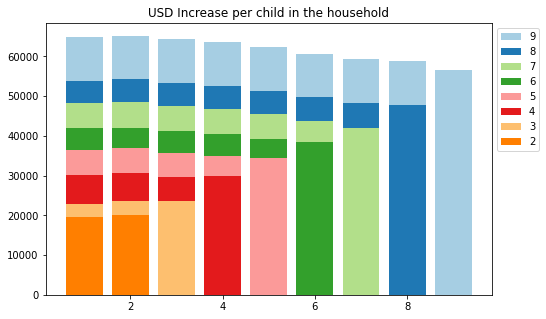

In [9]:
colors = sns.color_palette("Paired")[:8]
plt.figure(figsize=(8, 5))
plt.bar(range(1, 10), thresh_df.loc['Nine people or more'][0:9].values, label='9', color=colors[0])
plt.bar(range(1, 9), thresh_df.loc['Eight people'][0:8].values, label='8', color=colors[1])
plt.bar(range(1, 8), thresh_df.loc['Seven people'][0:7].values, label='7', color=colors[2])
plt.bar(range(1, 7), thresh_df.loc['Six people'][0:6].values, label='6', color=colors[3])
plt.bar(range(1, 6), thresh_df.loc['Five people'][0:5].values, label='5', color=colors[4])
plt.bar(range(1, 5), thresh_df.loc['Four people'][0:4].values, label='4', color=colors[5])
plt.bar(range(1, 4), thresh_df.loc['Three people'][0:3].values, label='3', color= colors[6])
plt.bar(range(1, 3), thresh_df.loc['Householder under 65 years'][0:2].values, label='2', color=colors[7])
plt.legend(bbox_to_anchor=(1, 1))
plt.title("USD Increase per child in the household")
plt.show()

As the number of children in the household increases, the threshold for the level of poverty decreases.

[314.0, -866.0, -727.0, -1194.0, -1643.0, -1486.0, -368.0, -2267.0]


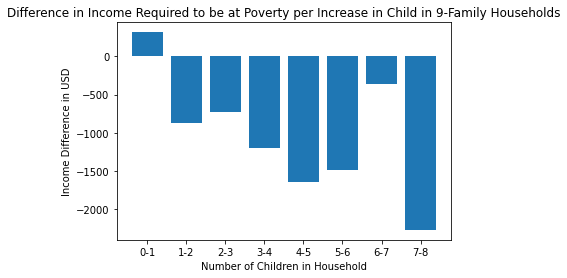

In [10]:
print(differences(thresh_df.loc['Nine people or more'][0:9].values))
plt.bar(range(1, 9), differences(thresh_df.loc['Nine people or more'][0:9].values))
plt.title("Difference in Income Required to be at Poverty per Increase in Child in 9-Family Households")
plt.xlabel('Number of Children in Household')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8"])
plt.ylabel('Income Difference in USD')
plt.show()

As the number of children in the household increases, the difference between the amount of income required to meet poverty level standards decreases, with the exception of the difference between households with 6 and 7 children.

*Note:* An example on how to interpret this graph: The first bar represents the difference between income levels of households with no children and one child.  
Poverty level income of households of 9 people with no children: \\$64,815  
Poverty level income of households of 9 people with one child: \\$65,129  
65,129 - 64,815 = 314.  
Thus, as the number of children in 9 people households increase from 0 to 1, the income level required to be considered at the poverty line increases by \\$314.

Now let's look at the difference between income levels of households with four children and five children.  
Poverty level income of households of 9 people with four children: \\$62,342  
Poverty level income of households of 9 people with five children: \\$60,699  
60,699 - 62,342 = -1643.  
As the number of children in 9 people households increase from 4 to 5, the income level required to be considered at the poverty line *decreases* by \\$1643.

In [11]:
thresh_df.loc['Householder under 65 years':].xs(' None', level=1, axis=1)

,Related children under 18 years
Size of family unit,
Householder under 65 years,19597.0
Householder 65 years and over,17689.0
Three people,22892.0
Four people,30186.0
Five people,36402.0
Six people,41869.0
Seven people,48176.0
Eight people,53881.0
Nine people or more,64815.0


According to the [Federal Register Annual Update of HHS Poverty Guidelines](https://www.federalregister.gov/documents/2023/01/19/2023-00885/annual-update-of-the-hhs-poverty-guidelines), for 2023, the poverty guidelines for Massachusetts are:

| Persons in family/household | Poverty |
| --- | --- |
| 1 | 14,580 | 
| 2 | 19,720 |
| 3 | 24,860 |
| 4 | 30,000 |
| 5 | 35,140 |
| 6 | 40,280 |
| 7 | 45,420 |
| 8 | 50,560 |
| 9+ | +5,140 per person |

In [12]:
hhs_guidelines = np.array([[1, 14580], [2, 19720], [3, 24860], [4, 30000], [5, 35140], [6,40280], [7, 45420], [8, 50560]])
hhs_df = pd.DataFrame(data=hhs_guidelines, columns=['Persons in family/household', 'Poverty'])
hhs_df

,Persons in family/household,Poverty
0,1,14580
1,2,19720
2,3,24860
3,4,30000
4,5,35140
5,6,40280
6,7,45420
7,8,50560


In [13]:
hhs_diff = differences(hhs_df['Poverty'])
hhs_diff

[5140, 5140, 5140, 5140, 5140, 5140, 5140]

Increasing the household size by 1 increases the amount of money their income needs to be less of to be under the poverty line by 5140. Unlike the data provided by the US Census Bureau, the increase is constant, and does not detail if the number of children affects the change in income level.

I will continue my analysis once I obtain the necessary census data.

## Analysis of Family Size and Poverty in Suffolk County

I will now focus on the data specific to the census tracts of Suffolk County.

#### Cleaning S1702 Census Data

In [14]:
s1702 = pd.read_excel("data/S1702.xlsx", sheet_name='Data', header=[0, 1, 2, 3]).copy()
s1702.head()

Unnamed: 0_level_0  \
                                  Unnamed: 0_level_1   
                                  Unnamed: 0_level_2   
                                               Label   
0                                           Families   
1  With related children of householder under 18 ...   
2  With related children of householder under 5 y...   
3  With related children of householder under 5 y...   
4  With related children of householder 5 to 17  ...   

  Census Tract 1.01, Suffolk County, Massachusetts                  \
                                      All families                   
                                             Total                   
                                          Estimate Margin of Error   
0                                              191             ±61   
1                                               96             ±61   
2                                                0             ±13   
3                                                0             ±13   
4                                               96             ±61   

                                                                       \
                                              Married-couple families   
  Percent below poverty level                                   Total   
                     Estimate Margin of Error                Estimate   
0                        0.0%           ±18.8                     166   
1                        0.0%           ±32.7                      96   
2                           -              **                       0   
3                           -              **                       0   
4                        0.0%           ±32.7                      96   

                                                               \
                                                                
                  Percent below poverty level                   
  Margin of Error                    Estimate Margin of Error   
0             ±55                        0.0%           ±21.2   
1             ±61                        0.0%           ±32.7   
2             ±13                           -              **   
3             ±13                           -              **   
4             ±61                        0.0%           ±32.7   

                                         ...  \
  Female householder, no spouse present  ...   
                                  Total  ...   
                               Estimate  ...   
0                                    25  ...   
1                                     0  ...   
2                                     0  ...   
3                                     0  ...   
4                                     0  ...   

  Census Tract 9901.01, Suffolk County, Massachusetts                  \
                                         All families                   
                          Percent below poverty level                   
                                             Estimate Margin of Error   
0                                                  -               **   
1                                                  -               **   
2                                                  -               **   
3                                                  -               **   
4                                                  -               **   

                                                                       \
  Married-couple families                                               
                    Total                 Percent below poverty level   
                 Estimate Margin of Error                    Estimate   
0                       0             ±13                           -   
1                       0             ±13                           -   
2                       0             ±13                           -   
3                       0             ±13           

In [15]:
# reformat table

# parse out census tracts
census_tracts = [tract.split(',')[0].split(' ')[2] for tract in s1702.columns.levels[0] if 'Census Tract' in tract]
s1702.columns.set_levels(census_tracts + ['Census Tract'], level=0, inplace=True)
s1702.set_index(s1702['Census Tract'].values.flatten(), inplace=True)
s1702.drop(columns=['Census Tract'], inplace=True)

s1702.head()

1.01  \
                                                   All families   
                                                          Total   
                                                       Estimate   
Families                                                    191   
With related children of householder under 18 y...           96   
With related children of householder under 5 years            0   
With related children of householder under 5 ye...            0   
With related children of householder 5 to 17  y...           96   

                                                                    \
                                                                     
                                                                     
                                                   Margin of Error   
Families                                                       ±61   
With related children of householder under 18 y...             ±61   
With related children of householder under 5 years             ±13   
With related children of householder under 5 ye...             ±13   
With related children of householder 5 to 17  y...             ±61   

                                                                                \
                                                                                 
                                                   Percent below poverty level   
                                                                      Estimate   
Families                                                                  0.0%   
With related children of householder under 18 y...                        0.0%   
With related children of householder under 5 years                           -   
With related children of householder under 5 ye...                           -   
With related children of householder 5 to 17  y...                        0.0%   

                                                                    \
                                                                     
                                                                     
                                                   Margin of Error   
Families                                                     ±18.8   
With related children of householder under 18 y...           ±32.7   
With related children of householder under 5 years              **   
With related children of householder under 5 ye...              **   
With related children of householder 5 to 17  y...           ±32.7   

                                                                            \
                                                   Married-couple families   
                                                                     Total   
                                                                  Estimate   
Families                                                               166   
With related children of householder under 18 y...                      96   
With related children of householder under 5 years                       0   
With related children of householder under 5 ye...                       0   
With related children of householder 5 to 17  y...                      96   

                                                                    \
                                                                     
                                                                     
                                                   Margin of Error   
Families                                                       ±55   
With related children of householder under 18 y...             ±61   
With related children of householder under 5 years             ±13   
With related children of householder under 5 ye...             ±13   
With related children of householder 5 to 17  y...             ±61   

                                                                                \
                                      

In [16]:
# flatten dataset and clean more
s1702_2 = s1702.T.reset_index()
to_rename = {'level_0': 'Census Tract', 'level_1': 'Family Status', 'level_2': 'Data','level_3': 'Value'}
s1702_2.rename(columns=to_rename, inplace=True)

s1702_2 = s1702_2.apply(lambda x: x.str.replace('%', '').str.replace('±', '').str.replace(',', ''), axis=1)
for col in s1702_2.columns[5:]:
    s1702_2[col] = pd.to_numeric(s1702_2[col], errors='coerce')

# save to csv file
# s1702_2.to_csv('data/S1702_cleaned.csv', index=False)

#### Cleaning B17013 Census Data

In [17]:
b17013 = pd.read_excel("data/B17013.xlsx", sheet_name='Data', header=[0, 1]).copy()
b17013.head()

Unnamed: 0_level_0  \
                                               Label   
0                                             Total:   
1  Income in the past 12 months below poverty level:   
2                             Married-couple family:   
3                                           2 people   
4                                      3 to 4 people   

  Census Tract 1.01, Suffolk County, Massachusetts                  \
                                          Estimate Margin of Error   
0                                              191             ±61   
1                                                0             ±13   
2                                                0             ±13   
3                                                0             ±13   
4                                                0             ±13   

  Census Tract 1.02, Suffolk County, Massachusetts                  \
                                          Estimate Margin of Error   
0                                              611            ±130   
1                                               83             ±57   
2                                                0             ±13   
3                                                0             ±13   
4                                                0             ±13   

  Census Tract 2.01, Suffolk County, Massachusetts                  \
                                          Estimate Margin of Error   
0                                              682            ±159   
1                                               79            ±101   
2                                               79            ±101   
3                                                7             ±12   
4                                                0             ±13   

  Census Tract 2.02, Suffolk County, Massachusetts                  \
                                          Estimate Margin of Error   
0                                              723            ±141   
1                                              149             ±75   
2                                               44             ±47   
3                                                2              ±7   
4                                               24             ±35   

  Census Tract 3.01, Suffolk County, Massachusetts  ...  \
                                          Estimate  ...   
0                                              379  ...   
1                                               18  ...   
2                                               18  ...   
3                                               18  ...   
4                                                0  ...   

  Census Tract 9816, Suffolk County, Massachusetts                  \
                                          Estimate Margin of Error   
0                                                0             ±13   
1                                                0             ±13   
2                                                0             ±13   
3                                                0             ±13   
4                                                0             ±13   

  Census Tract 9817, Suffolk County, Massachusetts                  \
                                          Estimate Margin of Error   
0                                                0             ±13   
1                                                0             ±13   
2                                                0             ±13   
3                                                0             ±13   
4                                                0             ±13   

  Census Tract 9818, Suffolk County, Massachusetts                  \
                                          Estimate Margin of Error   
0                                               17             ±19   
1                                                0             ±13   
2

In [18]:
# # reformat table

# # parse out census tracts
census_tracts = [tract.split(',')[0].split(' ')[2] for tract in b17013.columns.levels[0] if 'Census Tract' in tract]
b17013.columns.set_levels(census_tracts + ['Census Tract'], level=0, inplace=True)
b17013.set_index(b17013['Census Tract'].values.flatten(), inplace=True)
b17013.drop(columns=['Census Tract'], inplace=True)

# rename each index so we do not have duplicates
to_rename = []

poverty_levels = ['Income in the past 12 months below poverty level:', 'Income in the past 12 months at or above poverty level:']
family_types = ['Married-couple family:', 'Male householder, no spouse present:', 'Female householder, no spouse present:']
family_sizes = ['2 people', '3 to 4 people', '5 to 6 people', '7 or more people']
current_type = family_types[0]
current_level = poverty_levels[0]

for index in b17013.index:
    if index in poverty_levels:
        if index == poverty_levels[0]:
            current_level = "Below Poverty"
        else:
            current_level = "Above Poverty"
        to_rename.append(index.replace(':', ''))
    elif index == 'Other families:':
        to_rename.append('Other families ' + current_level.lower())
    elif index in family_types:
        current_type = index.split(',')[0].replace(':', '')
        to_rename.append(index.replace(':', '') + ' ' + current_level.lower())
    elif index in family_sizes:
        new_name = current_type + " " + current_level.lower() + ": " + index
        to_rename.append(new_name)
    else:
        to_rename.append(index.replace(':', ''))
    
to_rename
b17013.index = to_rename

b17013.head()

1.01                  \
                                                   Estimate Margin of Error   
Total                                                   191             ±61   
Income in the past 12 months below poverty level          0             ±13   
Married-couple family below poverty                       0             ±13   
Married-couple family below poverty: 2 people             0             ±13   
Married-couple family below poverty: 3 to 4 people        0             ±13   

                                                       1.02                  \
                                                   Estimate Margin of Error   
Total                                                   611            ±130   
Income in the past 12 months below poverty level         83             ±57   
Married-couple family below poverty                       0             ±13   
Married-couple family below poverty: 2 people             0             ±13   
Married-couple family below poverty: 3 to 4 people        0             ±13   

                                                       2.01                  \
                                                   Estimate Margin of Error   
Total                                                   682            ±159   
Income in the past 12 months below poverty level         79            ±101   
Married-couple family below poverty                      79            ±101   
Married-couple family below poverty: 2 people             7             ±12   
Married-couple family below poverty: 3 to 4 people        0             ±13   

                                                       2.02                  \
                                                   Estimate Margin of Error   
Total                                                   723            ±141   
Income in the past 12 months below poverty level        149             ±75   
Married-couple family below poverty                      44             ±47   
Married-couple family below poverty: 2 people             2              ±7   
Married-couple family below poverty: 3 to 4 people       24             ±35   

                                                       3.01                  \
                                                   Estimate Margin of Error   
Total                                                   379            ±145   
Income in the past 12 months below poverty level         18             ±27   
Married-couple family below poverty                      18             ±27   
Married-couple family below poverty: 2 people            18             ±27   
Married-couple family below poverty: 3 to 4 people        0             ±13   

                                                    ...     9816  \
                                                    ... Estimate   
Total                                               ...        0   
Income in the past 12 months below poverty level    ...        0   
Married-couple family below poverty                 ...        0   
Married-couple family below poverty: 2 people       ...        0   
Married-couple family below poverty: 3 to 4 people  ...        0   

                                                                       9817  \
                                                   Margin of Error Estimate   
Total                                                          ±13        0   
Income in the past 12 months below poverty level               ±13        0   
Married-couple family below poverty                            ±13        0   
Married-couple family below poverty: 2 people                  ±13        0   
Married-couple family below poverty: 3 to 4 people             ±13        0   

                                                                       9818  \
                                                   Margin of Error Estimate   
Total                                                          ±13       17   
Income in the pas

In [19]:
# flatten dataset and clean more
b17013_2 = b17013.T.reset_index()
b17013_2 = b17013_2.rename(columns={'level_0': 'Census Tract', 'level_1': 'Value'})
b17013_2 = b17013_2.astype(str).apply(lambda x: x.str.replace('%', '').str.replace('±', '').str.replace(',', ''), axis=1)

for col in b17013_2.columns[2:]:
    b17013_2[col] = pd.to_numeric(b17013_2[col], errors='coerce')

# save to csv file
# b17013_2.to_csv('data/B17013_cleaned.csv', index=False)

### Analysis of B17013: Poverty Status in the Past 12 Months of Families by Household Type by Number of Persons in Family

In [20]:
# load csv
b17013 = pd.read_csv('data/B17013_cleaned.csv')
b17013.head()

,Census Tract,Value,Total,Income in the past 12 months below poverty level,Married-couple family below poverty,Married-couple family below poverty: 2 people,Married-couple family below poverty: 3 to 4 people,Married-couple family below poverty: 5 to 6 people,Married-couple family below poverty: 7 or more people,Other families below poverty,...,"Male householder, no spouse present above poverty",Male householder above poverty: 2 people,Male householder above poverty: 3 to 4 people,Male householder above poverty: 5 to 6 people,Male householder above poverty: 7 or more people,"Female householder, no spouse present above poverty",Female householder above poverty: 2 people,Female householder above poverty: 3 to 4 people,Female householder above poverty: 5 to 6 people,Female householder above poverty: 7 or more people
0,1.01,Estimate,191,0,0,0,0,0,0,0,...,0,0,0,0,0,25,13,12,0,0
1,1.01,Margin of Error,61,13,13,13,13,13,13,13,...,13,13,13,13,13,30,22,21,13,13
2,1.02,Estimate,611,83,0,0,0,0,0,83,...,20,20,0,0,0,58,58,0,0,0
3,1.02,Margin of Error,130,57,13,13,13,13,13,57,...,25,25,13,13,13,60,60,13,13,13
4,2.01,Estimate,682,79,79,7,0,0,72,0,...,62,0,62,0,0,63,51,12,0,0


In [21]:
b17013.columns

Index(['Census Tract', 'Value', 'Total',
       'Income in the past 12 months below poverty level',
       'Married-couple family below poverty',
       'Married-couple family below poverty: 2 people',
       'Married-couple family below poverty: 3 to 4 people',
       'Married-couple family below poverty: 5 to 6 people',
       'Married-couple family below poverty: 7 or more people',
       'Other families below poverty',
       'Male householder, no spouse present below poverty',
       'Male householder below poverty: 2 people',
       'Male householder below poverty: 3 to 4 people',
       'Male householder below poverty: 5 to 6 people',
       'Male householder below poverty: 7 or more people',
       'Female householder, no spouse present below poverty',
       'Female householder below poverty: 2 people',
       'Female householder below poverty: 3 to 4 people',
       'Female householder below poverty: 5 to 6 people',
       'Female householder below poverty: 7 or more people',

### Visualizations for Families Below the Poverty Line

Married-couple family below poverty: 2 people            11.072340
Married-couple family below poverty: 3 to 4 people        7.965957
Married-couple family below poverty: 5 to 6 people        5.042553
Married-couple family below poverty: 7 or more people     0.638298
dtype: float64


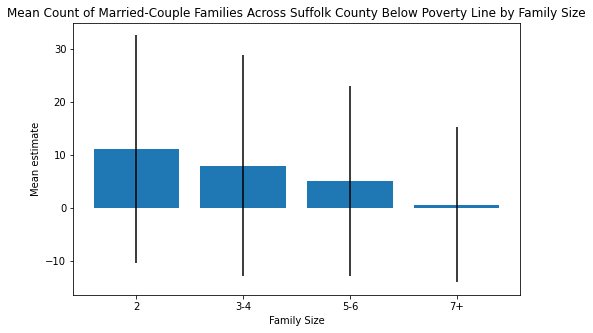

In [22]:
married_below_poverty = ['Married-couple family below poverty: 2 people', 'Married-couple family below poverty: 3 to 4 people',
       'Married-couple family below poverty: 5 to 6 people', 'Married-couple family below poverty: 7 or more people']

print(b17013[b17013['Value'] == 'Estimate'][married_below_poverty].mean())
plt.figure(figsize=(8, 5))
plt.bar(['2', '3-4', '5-6', '7+'], b17013[b17013['Value'] == 'Estimate'][married_below_poverty].mean(),
       yerr=b17013[b17013['Value'] == 'Margin of Error'][married_below_poverty].mean())
plt.xlabel('Family Size')
plt.ylabel('Mean estimate')
plt.title('Mean Count of Married-Couple Families Across Suffolk County Below Poverty Line by Family Size')
plt.show()

**Observations:**
- Families consisting of only married couples (family size = 2) have the highest mean count below the poverty line
- Families of size 7+ with married couples have the lowest mean count below the poverty line
- However, the margin of error is very high

Male householder below poverty: 2 people            3.748936
Male householder below poverty: 3 to 4 people       2.263830
Male householder below poverty: 5 to 6 people       0.497872
Male householder below poverty: 7 or more people    0.140426
dtype: float64


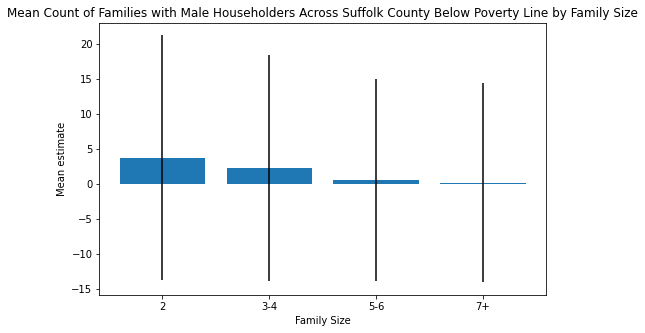

In [23]:
male_householder_poverty = ['Male householder below poverty: 2 people', 'Male householder below poverty: 3 to 4 people',
                            'Male householder below poverty: 5 to 6 people', 'Male householder below poverty: 7 or more people']

print(b17013[b17013['Value'] == 'Estimate'][male_householder_poverty].mean())
plt.figure(figsize=(8, 5))
plt.bar(['2', '3-4', '5-6', '7+'], b17013[b17013['Value'] == 'Estimate'][male_householder_poverty].mean(),
       yerr=b17013[b17013['Value'] == 'Margin of Error'][male_householder_poverty].mean())
plt.xlabel('Family Size')
plt.ylabel('Mean estimate')
plt.title('Mean Count of Families with Male Householders Across Suffolk County Below Poverty Line by Family Size')
plt.show()

**Observations:**
- The count is much lower for male householders without spouses compared to married couples
- A similar trend follows where as the family size increases, the count of families under the poverty line decreases
- However, as with married couples, the margin of error is also high

Female householder below poverty: 2 people            20.063830
Female householder below poverty: 3 to 4 people       24.302128
Female householder below poverty: 5 to 6 people        4.795745
Female householder below poverty: 7 or more people     1.144681
dtype: float64


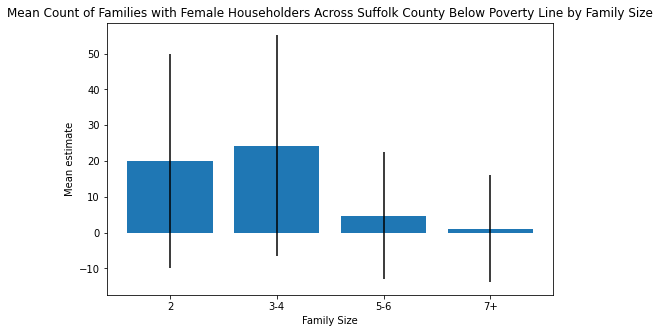

In [24]:
female_householder_poverty = ['Female householder below poverty: 2 people', 'Female householder below poverty: 3 to 4 people',
                            'Female householder below poverty: 5 to 6 people', 'Female householder below poverty: 7 or more people']

print(b17013[b17013['Value'] == 'Estimate'][female_householder_poverty].mean())
plt.figure(figsize=(8, 5))
plt.bar(['2', '3-4', '5-6', '7+'], b17013[b17013['Value'] == 'Estimate'][female_householder_poverty].mean(),
       yerr=b17013[b17013['Value'] == 'Margin of Error'][female_householder_poverty].mean())
plt.xlabel('Family Size')
plt.ylabel('Mean estimate')
plt.title('Mean Count of Families with Female Householders Across Suffolk County Below Poverty Line by Family Size')
plt.show()

**Observations:**
- The count of families with female householders below the poverty line is much higher than that of male householders or married couples
- The number of families with female householders below the poverty line seems to be the greatest at family sizes of 3-4
- As with married-couple families and male householder families, the  are rather low for family sizes of 7+
    - Though this may be due to the fewer number of large households compared to households with 2-4 people

### Visualizations for Families Above the Poverty Line

Married-couple family above poverty: 2 people            171.425532
Married-couple family above poverty: 3 to 4 people       154.327660
Married-couple family above poverty: 5 to 6 people        43.604255
Married-couple family above poverty: 7 or more people      6.246809
dtype: float64


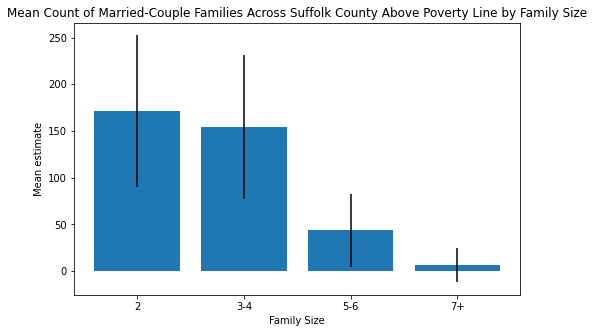

In [25]:
married_above_poverty = ['Married-couple family above poverty: 2 people', 'Married-couple family above poverty: 3 to 4 people',
                         'Married-couple family above poverty: 5 to 6 people', 'Married-couple family above poverty: 7 or more people']

print(b17013[b17013['Value'] == 'Estimate'][married_above_poverty].mean())
plt.figure(figsize=(8, 5))
plt.bar(['2', '3-4', '5-6', '7+'], b17013[b17013['Value'] == 'Estimate'][married_above_poverty].mean(),
       yerr=b17013[b17013['Value'] == 'Margin of Error'][married_above_poverty].mean())
plt.xlabel('Family Size')
plt.ylabel('Mean estimate')
plt.title('Mean Count of Married-Couple Families Across Suffolk County Above Poverty Line by Family Size')
plt.show()

**Observations:**
- As with families below the poverty line, families consisting of only married couples (family size = 2) have the highest mean count above the poverty line
- The scale of the estimate is also much higher, with much more families being above the poverty line than below
- Families of size 7+ with married couples have the lowest mean count above the poverty line

Similar observations can be seen with male and female head-of-household families.

Male householder above poverty: 2 people            29.591489
Male householder above poverty: 3 to 4 people       19.353191
Male householder above poverty: 5 to 6 people        3.370213
Male householder above poverty: 7 or more people     1.268085
dtype: float64


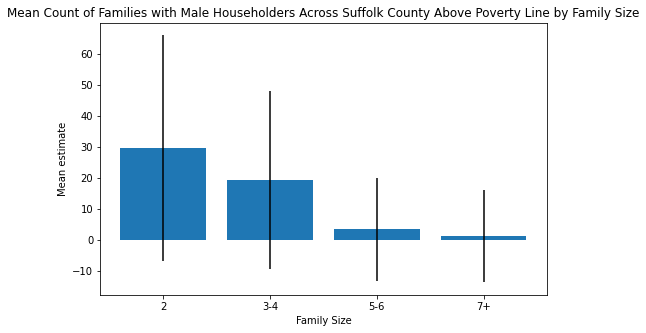

In [26]:
male_householder = ['Male householder above poverty: 2 people', 'Male householder above poverty: 3 to 4 people',
                            'Male householder above poverty: 5 to 6 people', 'Male householder above poverty: 7 or more people']

print(b17013[b17013['Value'] == 'Estimate'][male_householder].mean())
plt.figure(figsize=(8, 5))
plt.bar(['2', '3-4', '5-6', '7+'], b17013[b17013['Value'] == 'Estimate'][male_householder].mean(),
       yerr=b17013[b17013['Value'] == 'Margin of Error'][male_householder].mean())
plt.xlabel('Family Size')
plt.ylabel('Mean estimate')
plt.title('Mean Count of Families with Male Householders Across Suffolk County Above Poverty Line by Family Size')
plt.show()

Female householder above poverty: 2 people            69.263830
Female householder above poverty: 3 to 4 people       61.536170
Female householder above poverty: 5 to 6 people       10.046809
Female householder above poverty: 7 or more people     2.025532
dtype: float64


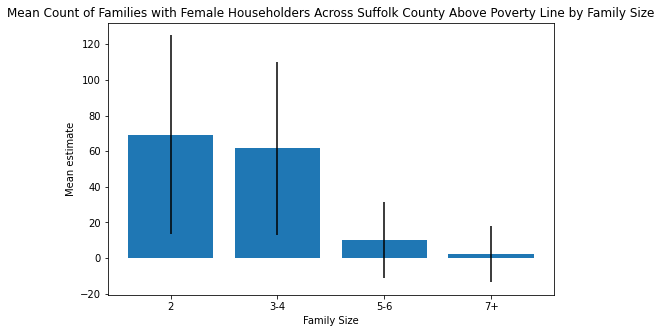

In [27]:
female_householder = ['Female householder above poverty: 2 people', 'Female householder above poverty: 3 to 4 people',
                            'Female householder above poverty: 5 to 6 people', 'Female householder above poverty: 7 or more people']

print(b17013[b17013['Value'] == 'Estimate'][female_householder].mean())
plt.figure(figsize=(8, 5))
plt.bar(['2', '3-4', '5-6', '7+'], b17013[b17013['Value'] == 'Estimate'][female_householder].mean(),
       yerr=b17013[b17013['Value'] == 'Margin of Error'][female_householder].mean())
plt.xlabel('Family Size')
plt.ylabel('Mean estimate')
plt.title('Mean Count of Families with Female Householders Across Suffolk County Above Poverty Line by Family Size')
plt.show()

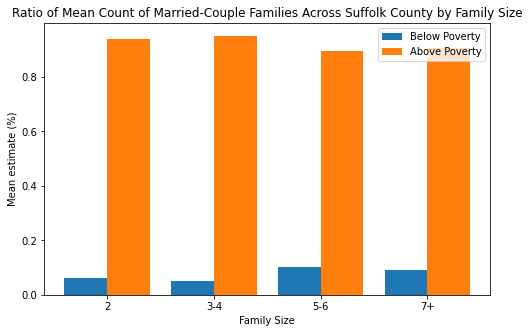

In [28]:
married_below_poverty = ['Married-couple family below poverty: 2 people', 'Married-couple family below poverty: 3 to 4 people',
       'Married-couple family below poverty: 5 to 6 people', 'Married-couple family below poverty: 7 or more people']
married_above_poverty = ['Married-couple family above poverty: 2 people', 'Married-couple family above poverty: 3 to 4 people',
                         'Married-couple family above poverty: 5 to 6 people', 'Married-couple family above poverty: 7 or more people']

mean_below = b17013[b17013['Value'] == 'Estimate'][married_below_poverty].mean()
mean_above = b17013[b17013['Value'] == 'Estimate'][married_above_poverty].mean()

labels = ['2', '3-4', '5-6', '7+']
X_axis = np.arange(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(X_axis - 0.2, mean_below.values / (mean_above.values + mean_below.values), 0.4, label = 'Below Poverty')
plt.bar(X_axis + 0.2, mean_above.values / (mean_above.values + mean_below.values), 0.4, label = 'Above Poverty')
plt.xticks(X_axis, labels)
plt.xlabel('Family Size')
plt.ylabel('Mean estimate (%)')
plt.title('Ratio of Mean Count of Married-Couple Families Across Suffolk County by Family Size')
plt.legend()
plt.show()

**Observations:**
- The ratio of families with married couples above the poverty line and below the poverty line is very large, with more than 80% of all married-couple families in Suffolk County above the poverty line

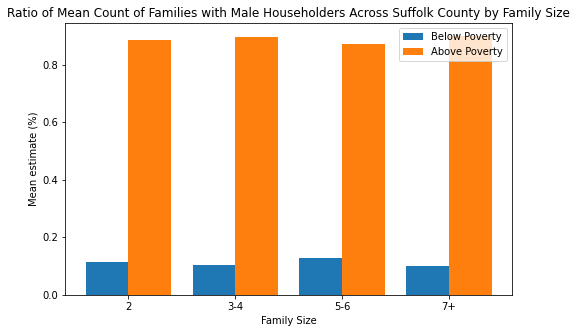

In [29]:
male_below_poverty = ['Male householder below poverty: 2 people', 'Male householder below poverty: 3 to 4 people',
                    'Male householder below poverty: 5 to 6 people', 'Male householder below poverty: 7 or more people']
male_above_poverty = ['Male householder above poverty: 2 people', 'Male householder above poverty: 3 to 4 people',
                            'Male householder above poverty: 5 to 6 people', 'Male householder above poverty: 7 or more people']

mean_below = b17013[b17013['Value'] == 'Estimate'][male_below_poverty].mean()
mean_above = b17013[b17013['Value'] == 'Estimate'][male_above_poverty].mean()

labels = ['2', '3-4', '5-6', '7+']
X_axis = np.arange(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(X_axis - 0.2, mean_below.values / (mean_above.values + mean_below.values), 0.4, label = 'Below Poverty')
plt.bar(X_axis + 0.2, mean_above.values / (mean_above.values + mean_below.values), 0.4, label = 'Above Poverty')
plt.xticks(X_axis, labels)
plt.xlabel('Family Size')
plt.ylabel('Mean estimate (%)')
plt.title('Ratio of Mean Count of Families with Male Householders Across Suffolk County by Family Size')
plt.legend()
plt.show()

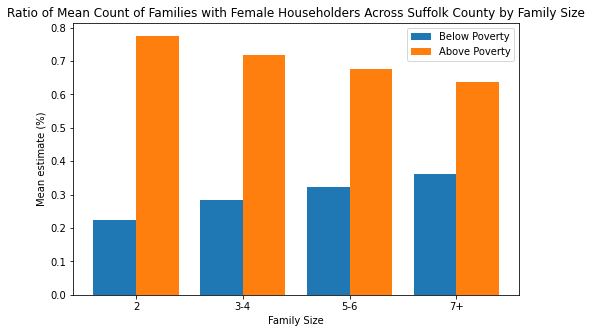

In [30]:
female_below_poverty = ['Female householder below poverty: 2 people', 'Female householder below poverty: 3 to 4 people',
                    'Female householder below poverty: 5 to 6 people', 'Female householder below poverty: 7 or more people']
female_above_poverty = ['Female householder above poverty: 2 people', 'Female householder above poverty: 3 to 4 people',
                            'Female householder above poverty: 5 to 6 people', 'Female householder above poverty: 7 or more people']

mean_below = b17013[b17013['Value'] == 'Estimate'][female_below_poverty].mean()
mean_above = b17013[b17013['Value'] == 'Estimate'][female_above_poverty].mean()

labels = ['2', '3-4', '5-6', '7+']
X_axis = np.arange(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(X_axis - 0.2, mean_below.values / (mean_above.values + mean_below.values), 0.4, label = 'Below Poverty')
plt.bar(X_axis + 0.2, mean_above.values / (mean_above.values + mean_below.values), 0.4, label = 'Above Poverty')
plt.xticks(X_axis, labels)
plt.xlabel('Family Size')
plt.ylabel('Mean estimate (%)')
plt.title('Ratio of Mean Count of Families with Female Householders Across Suffolk County by Family Size')
plt.legend()
plt.show()

**Notes:**
- There tend to be higher counts of smaller-sized (2-4 people) families under the poverty line in Suffolk County, while larger families are rarer
- The count of families with female householders (no spouse) living under the poverty line tend to be higher, while families with male householders (no spouse) living under the poverty line tend to be rarer.
- The ratio between married couple and male householder families above and below the poverty line is much greater than female householder families
- The data visualization above may not be representative of the population of Suffolk County as there is a lot of missing data, and thus a high margin of error
- Many of the columns which do not have adequate data have been filled in with zeros, which may have brought down the overall average
- This data does not taken into account percentages, so the ratio of family households of a specific size under poverty to all family households living in the tract may be different